In [3]:
import glob, os
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
import torch

ModuleNotFoundError: No module named 'pytorch'

In [2]:
folder_path = f"../sts-storage/dpath/"
WS2_folder_path = "run_WS2_defects/"

In [3]:
path = folder_path + WS2_folder_path
file_path = path + "dI_dV00026.dat"
file_path

'../sts-storage/dpath/run_WS2_defects/dI_dV00026.dat'

In [4]:
# get list of files with .dat extension
files = glob.glob(path + "*.dat")
ns = list(range(len(files)))

In [5]:
# Grab bias sweep column from first data file. This will be the independent variable for the water fall plot 
bias_df = pd.read_csv(files[0],
                     sep="\s+",
                     skiprows=10, 
                     usecols=[0], 
                     names=['Bias (V)'])
frames = []

# Iterate through each file with extension .dat
for file in files:
    sts_df = pd.read_csv(file,
                     sep="\s+",
                     skiprows=10, 
                     usecols=[3], 
                     names=['dI/dV (A/V)'])
    frames.append(sts_df)

current_dfs = pd.concat(frames,1)
current_dfs.head()

,dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),...,dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V)
0,3.394680e-11,3.787410e-11,5.040110e-11,3.476340e-11,4.543020e-11,4.902410e-11,3.522620e-11,3.902670e-11,3.537720e-11,4.908250e-11,...,1.059930e-10,4.673050e-11,3.828360e-11,2.319030e-11,2.441020e-11,4.293360e-11,5.383450e-11,3.450010e-11,4.428640e-11,3.620330e-11
1,3.405570e-11,3.660010e-11,5.006680e-11,3.378610e-11,4.515950e-11,4.760080e-11,3.480530e-11,3.939310e-11,3.531860e-11,4.890700e-11,...,7.789430e-11,4.547040e-11,2.654190e-11,2.287860e-11,2.731680e-11,4.239180e-11,5.611650e-11,3.412650e-11,4.405580e-11,3.543420e-11
2,3.316620e-11,3.633270e-11,4.990210e-11,3.361850e-11,4.370190e-11,4.844980e-11,3.474270e-11,3.892180e-11,3.460290e-11,4.799670e-11,...,6.772150e-11,4.434230e-11,2.410090e-11,2.200740e-11,2.068680e-11,4.195830e-11,5.439450e-11,3.338210e-11,4.293740e-11,3.505450e-11
3,3.246660e-11,3.497260e-11,4.873950e-11,3.291520e-11,4.405440e-11,4.631200e-11,3.354560e-11,3.830640e-11,3.411030e-11,4.616180e-11,...,8.841990e-11,4.530780e-11,2.440860e-11,2.215610e-11,1.800990e-11,4.107860e-11,5.529180e-11,2.799770e-11,4.204840e-11,3.489700e-11
4,3.249630e-11,3.508430e-11,4.759310e-11,3.269410e-11,4.279050e-11,4.580900e-11,3.337350e-11,3.715230e-11,3.331740e-11,4.503950e-11,...,5.801730e-11,4.286550e-11,2.324740e-11,2.138920e-11,1.800320e-11,3.976780e-11,4.970810e-11,1.332230e-11,4.265780e-11,3.387670e-11


In [6]:
current_scaled_dfs = current_dfs.applymap(lambda x: x/(1e-11))
current_scaled_dfs.head()

,dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),...,dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V)
0,3.39468,3.78741,5.04011,3.47634,4.54302,4.90241,3.52262,3.90267,3.53772,4.90825,...,10.59930,4.67305,3.82836,2.31903,2.44102,4.29336,5.38345,3.45001,4.42864,3.62033
1,3.40557,3.66001,5.00668,3.37861,4.51595,4.76008,3.48053,3.93931,3.53186,4.89070,...,7.78943,4.54704,2.65419,2.28786,2.73168,4.23918,5.61165,3.41265,4.40558,3.54342
2,3.31662,3.63327,4.99021,3.36185,4.37019,4.84498,3.47427,3.89218,3.46029,4.79967,...,6.77215,4.43423,2.41009,2.20074,2.06868,4.19583,5.43945,3.33821,4.29374,3.50545
3,3.24666,3.49726,4.87395,3.29152,4.40544,4.63120,3.35456,3.83064,3.41103,4.61618,...,8.84199,4.53078,2.44086,2.21561,1.80099,4.10786,5.52918,2.79977,4.20484,3.48970
4,3.24963,3.50843,4.75931,3.26941,4.27905,4.58090,3.33735,3.71523,3.33174,4.50395,...,5.80173,4.28655,2.32474,2.13892,1.80032,3.97678,4.97081,1.33223,4.26578,3.38767


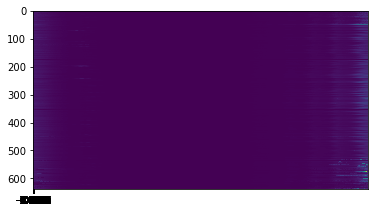

In [7]:
plt.xticks(bias_df.values)
plt.imshow(current_dfs.T, interpolation='none')

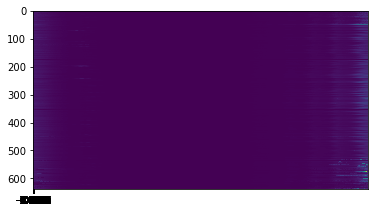

In [9]:
plt.xticks(bias_df.values)
plt.imshow(current_scaled_dfs.T, interpolation='none')

In [8]:
out = pd.concat([bias_df,current_dfs],axis=1)
out.head()

,Bias (V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),...,dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V),dI/dV (A/V)
0,1.60000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.59658,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.59316,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.58974,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.58632,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
out.to_csv(folder_path + "/WS2_defects_all_dIdV_exp.dat",index=False)